In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load the Dataset
We begin by loading the car dataset into a DataFrame. Make sure to replace the file path with the correct path to your data file.

In [2]:
 # Load the dataset (Replace with the correct file path)
df = pd.read_csv("auto.csv")  # provide the file path as necessary
df

3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6  \
0    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
1    1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   94.5   
2    2  164         audi     gas    std  four        sedan  fwd  front   99.8   
3    2  164         audi     gas    std  four        sedan  4wd  front   99.4   
4    2    ?         audi     gas    std   two        sedan  fwd  front   99.8   
..  ..  ...          ...     ...    ...   ...          ...  ...    ...    ...   
199 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
200 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   
201 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
202 -1   95        volvo  diesel  turbo  four        sedan  rwd  front  109.1   
203 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   

     ...  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
0    ...  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1    ...  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2    ...  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
3    ...  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  
4    ...  136  mpfi  3.19  3.40   8.5  110  5500  19  25  15250  
..   ...  ...   ...   ...   ...   ...  ...   ...  ..  ..    ...  
199  ...  141  mpfi  3.78  3.15   9.5  114  5400  23  28  16845  
200  ...  141  mpfi  3.78  3.15   8.7  160  5300  19  25  19045  
201  ...  173  mpfi  3.58  2.87   8.8  134  5500  18  23  21485  
202  ...  145   idi  3.01  3.40  23.0  106  4800  26  27  22470  
203  ...  141  mpfi  3.78  3.15   9.5  114  5400  19  25  22625  

[204 rows x 26 columns]

## Understanding the Dataset

In [3]:
# Display plots inline
%matplotlib inline

# Define column names manually
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", 
    "num-of-doors", "body-style", "drive-wheels", "engine-location", 
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type", 
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", 
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
]
# Display corrected column names
print("Corrected Column Names:")
print(df.columns)

Corrected Column Names:
Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9.0', '111', '5000', '21', '27', '13495'],
      dtype='object')


In [4]:
# Reload dataset with specified headers
df = pd.read_csv("auto.csv", header=None, names=column_names)
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19    3.40              10.0        102   
4            136         mpfi  3.19    3.40               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01    3.40              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [5]:
# Dataset information
print("\nDataset Info:")
df.info()
print(df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size

In [6]:
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


symboling normalized-losses    make fuel-type aspiration  \
count   205.000000               205     205       205        205   
unique         NaN                52      22         2          2   
top            NaN                 ?  toyota       gas        std   
freq           NaN                41      32       185        168   
mean      0.834146               NaN     NaN       NaN        NaN   
std       1.245307               NaN     NaN       NaN        NaN   
min      -2.000000               NaN     NaN       NaN        NaN   
25%       0.000000               NaN     NaN       NaN        NaN   
50%       1.000000               NaN     NaN       NaN        NaN   
75%       2.000000               NaN     NaN       NaN        NaN   
max       3.000000               NaN     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
count           205        205          205             205  205.000000  ...   
unique            3          5            3               2         NaN  ...   
top            four      sedan          fwd           front         NaN  ...   
freq            114         96          120             202         NaN  ...   
mean            NaN        NaN          NaN             NaN   98.756585  ...   
std             NaN        NaN          NaN             NaN    6.021776  ...   
min             NaN        NaN          NaN             NaN   86.600000  ...   
25%             NaN        NaN          NaN             NaN   94.500000  ...   
50%             NaN        NaN          NaN             NaN   97.000000  ...   
75%             NaN        NaN          NaN             NaN  102.400000  ...   
max             NaN        NaN          NaN             NaN  120.900000  ...   

        engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
count    205.000000          205   205     205        205.000000        205   
unique          NaN            8    39      37               NaN         60   
top             NaN         mpfi  3.62    3.40               NaN         68   
freq            NaN           94    23      20               NaN         19   
mean     126.907317          NaN   NaN     NaN         10.142537        NaN   
std       41.642693          NaN   NaN     NaN          3.972040        NaN   
min       61.000000          NaN   NaN     NaN          7.000000        NaN   
25%       97.000000          NaN   NaN     NaN          8.600000        NaN   
50%      120.000000          NaN   NaN     NaN          9.000000        NaN   
75%      141.000000          NaN   NaN     NaN          9.400000        NaN   
max      326.000000          NaN   NaN     NaN         23.000000        NaN   

        peak-rpm    city-mpg highway-mpg price  
count        205  205.000000  205.000000   205  
unique        24         NaN         NaN   187  
top         5500         NaN         NaN     ?  
freq          37         NaN         NaN     4  
mean         NaN   25.219512   30.751220   NaN  
std          NaN    6.542142    6.886443   NaN  
min          NaN   13.000000   16.000000   NaN  
25%          NaN   19.000000   25.000000   NaN  
50%          NaN   24.000000   30.000000   NaN  
75%          NaN   30.000000   34.000000   NaN  
max          NaN   49.000000   54.000000   NaN  

[11 rows x 26 columns]

In [7]:
df.head() # print top 5 rows & columns of the dataset

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [8]:
df.tail() # print last 5 rows & columns of the dataset

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
200         mpfi  3.78    3.15               9.5        114      5400   
201         mpfi  3.78    3.15               8.7        160      5300   
202         mpfi  3.58    2.87               8.8        134      5500   
203          idi  3.01    3.40              23.0        106      4800   
204         mpfi  3.78    3.15               9.5        114      5400   

    city-mpg highway-mpg  price  
200       23          28  16845  
201       19          25  19045  
202       18          23  21485  
203       26          27  22470  
204       19          25  22625  

[5 rows x 26 columns]

In [9]:
df.nunique()
## returns the number of unique values for each column.

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [10]:
df.isnull()
##identify null values in the data

symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False              False  False      False       False         False   
1        False              False  False      False       False         False   
2        False              False  False      False       False         False   
3        False              False  False      False       False         False   
4        False              False  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
200      False              False  False      False       False         False   
201      False              False  False      False       False         False   
202      False              False  False      False       False         False   
203      False              False  False      False       False         False   
204      False              False  False      False       False         False   

     body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0         False         False            False       False  ...        False   
1         False         False            False       False  ...        False   
2         False         False            False       False  ...        False   
3         False         False            False       False  ...        False   
4         False         False            False       False  ...        False   
..          ...           ...              ...         ...  ...          ...   
200       False         False            False       False  ...        False   
201       False         False            False       False  ...        False   
202       False         False            False       False  ...        False   
203       False         False            False       False  ...        False   
204       False         False            False       False  ...        False   

     fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          False  False   False              False       False     False   
1          False  False   False              False       False     False   
2          False  False   False              False       False     False   
3          False  False   False              False       False     False   
4          False  False   False              False       False     False   
..           ...    ...     ...                ...         ...       ...   
200        False  False   False              False       False     False   
201        False  False   False              False       False     False   
202        False  False   False              False       False     False   
203        False  False   False              False       False     False   
204        False  False   False              False       False     False   

     city-mpg  highway-mpg  price  
0       False        False  False  
1       False        False  False  
2       False        False  False  
3       False        False  False  
4       False        False  False  
..        ...          ...    ...  
200     False        False  False  
201     False        False  False  
202     False        False  False  
203     False        False  False  
204     False        False  False  

[205 rows x 26 columns]

## Handling Missing Values & Invalid values
- Check for missing values in the dataset.
- Replace '?' with `NaN` for better handling.
- Use the mean for numeric columns and mode for categorical columns to fill missing values.

In [11]:
## to get the number of missing records in each column
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
# Replace '?' with NaN and convert numeric columns to appropriate types
df.replace('?', np.nan, inplace=True)
numeric_cols = ['normalized-losses', 'price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            130         mpfi  3.47    2.68               9.0      111.0   
2            152         mpfi  2.68    3.47               9.0      154.0   
3            109         mpfi  3.19    3.40              10.0      102.0   
4            136         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5      114.0   
201          141         mpfi  3.78    3.15               8.7      160.0   
202          173         mpfi  3.58    2.87               8.8      134.0   
203          145          idi  3.01    3.40              23.0      106.0   
204          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg    price  
0      5000.0       21           27  13495.0  
1      5000.0       21           27  16500.0  
2      5000.0       19           26  16500.0  
3      5500.0       24           30  13950.0  
4      5500.0       18           22  17450.0  
..        ...      ...          ...      ...  
200    5400.0       23           28  16845.0  
201    5300.0       19           25  19045.0  
202    5500.0       18           23  21485.0  
203    4800.0       26           27  22470.0  
204    5400.0       19           25  22625.0  

[205 rows x 26 columns]

In [13]:
# Missing values After handling '?' with NaN and convert numeric columns to appropriate types
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\1554218159.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['normalized-losses'].dropna(), shade=True, color="blue")
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


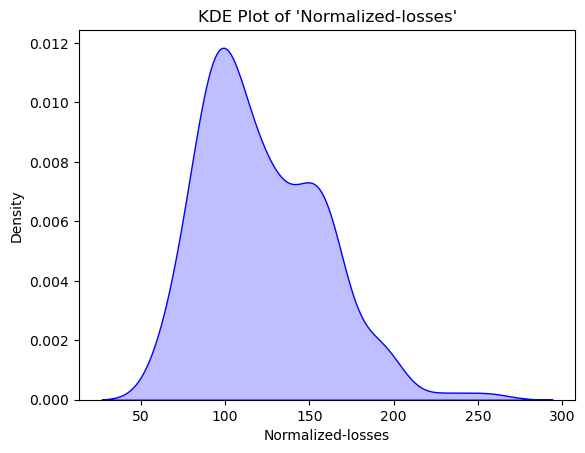

In [14]:
## Normalized-losses: Handling missing values
import seaborn as sns

sns.kdeplot(df['normalized-losses'].dropna(), shade=True, color="blue")
plt.title("KDE Plot of 'Normalized-losses'")
plt.xlabel("Normalized-losses")
plt.show()
## estimate of the Normalized losses distribution shape and is helpful for visually identifying skewness.

In [15]:
df['normalized-losses'].skew()

0.7659764175950632

In [16]:
# median value of entire normalised loss column
median_value = df['normalized-losses'].median()
print(median_value)

115.0


#### Normalized loss seems to be positively skewed/Right skewed, the missing values are replaced by "Median"

In [17]:
# the normalized losses for Alfa-Romero for cars in 1985 was measured as 154, imputing 154 in missing places.
df.iloc[0:3, 1]

0   NaN
1   NaN
2   NaN
Name: normalized-losses, dtype: float64

In [18]:
df.iloc[0:3, 1] = df.iloc[0:3, 1].fillna(154)
df

symboling  normalized-losses         make fuel-type aspiration  \
0            3              154.0  alfa-romero       gas        std   
1            3              154.0  alfa-romero       gas        std   
2            1              154.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            130         mpfi  3.47    2.68               9.0      111.0   
2            152         mpfi  2.68    3.47               9.0      154.0   
3            109         mpfi  3.19    3.40              10.0      102.0   
4            136         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5      114.0   
201          141         mpfi  3.78    3.15               8.7      160.0   
202          173         mpfi  3.58    2.87               8.8      134.0   
203          145          idi  3.01    3.40              23.0      106.0   
204          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg    price  
0      5000.0       21           27  13495.0  
1      5000.0       21           27  16500.0  
2      5000.0       19           26  16500.0  
3      5500.0       24           30  13950.0  
4      5500.0       18           22  17450.0  
..        ...      ...          ...      ...  
200    5400.0       23           28  16845.0  
201    5300.0       19           25  19045.0  
202    5500.0       18           23  21485.0  
203    4800.0       26           27  22470.0  
204    5400.0       19           25  22625.0  

[205 rows x 26 columns]

In [19]:
# the normalized losses for Audi
values_in_range = df.iloc[3:10,1]
median_value = values_in_range.median()
print(f"Median of the values in the range df.iloc[3:10,1]: {median_value}")

Median of the values in the range df.iloc[3:10,1]: 161.0


In [20]:
df.iloc[3:10,1] = df.iloc[3:10,1].fillna(median_value)
df.iloc[3:10,1]

3    164.0
4    164.0
5    161.0
6    158.0
7    161.0
8    158.0
9    161.0
Name: normalized-losses, dtype: float64

In [21]:
# the normalized losses for BMW
values_in_range1 = df.iloc[10:14,1]
median_value1 = values_in_range1.median()
print(f"Median of the values in the range1 df.iloc[10:14,1]: {median_value1}")

Median of the values in the range1 df.iloc[10:14,1]: 190.0


In [22]:
df.iloc[10:18,1] = df.iloc[10:18,1].fillna(median_value1)
df.iloc[10:18,1]

10    192.0
11    192.0
12    188.0
13    188.0
14    190.0
15    190.0
16    190.0
17    190.0
Name: normalized-losses, dtype: float64

In [23]:
# the normalized losses for isuzu, as the value is unknown, I have replaced with overall median of normalised losses.
df.iloc[43:47, 1] = df.iloc[43:47, 1].fillna(118.5)
df.iloc[43:47, 1]

43    118.5
44    118.5
45    118.5
46    118.5
Name: normalized-losses, dtype: float64

In [24]:
# the normalized losses for jaguar, we have only one data(145) for Jaguar. So, can replace with same data
df.iloc[48:50, 1] = df.iloc[48:50, 1].fillna(145)
df.iloc[46:52, 1]

46    118.5
47    145.0
48    145.0
49    145.0
50    104.0
51    104.0
Name: normalized-losses, dtype: float64

In [25]:
# the normalized losses for mazda
values_in_range2 = df.iloc[50:68,1]
median_value2 = values_in_range2.median()
print(f"Median of the values in the range2 df.iloc[50:68,1]: {median_value2}")

Median of the values in the range2 df.iloc[50:68,1]: 115.0


In [26]:
df.iloc[50:68,1] = df.iloc[50:68,1].fillna(median_value2)
df.iloc[48:70,1]

48    145.0
49    145.0
50    104.0
51    104.0
52    104.0
53    113.0
54    113.0
55    150.0
56    150.0
57    150.0
58    150.0
59    129.0
60    115.0
61    129.0
62    115.0
63    115.0
64    115.0
65    118.0
66    115.0
67     93.0
68     93.0
69     93.0
Name: normalized-losses, dtype: float64

In [27]:
# the normalized losses for mercedes-benz
values_in_range3 = df.iloc[67:76,1]
median_value3 = values_in_range3.median()
print(f"Median of the values in the range3 df.iloc[67:76,1]: {median_value3}")

Median of the values in the range3 df.iloc[67:76,1]: 93.0


In [28]:
df.iloc[67:76,1] = df.iloc[67:76,1].fillna(median_value3)
df.iloc[67:78,1]

67     93.0
68     93.0
69     93.0
70     93.0
71     93.0
72    142.0
73     93.0
74     93.0
75     93.0
76    161.0
77    161.0
Name: normalized-losses, dtype: float64

In [29]:
# the normalized losses for mitsubishi
values_in_range4 = df.iloc[76:90,1]
median_value4 = values_in_range4.median()
print(f"Median of the values in the range4 df.iloc[76:90,1]: {median_value4}")

Median of the values in the range4 df.iloc[76:90,1]: 153.0


In [30]:
df.iloc[76:90,1] = df.iloc[76:90,1].fillna(median_value4)
df.iloc[76:90,1]

76    161.0
77    161.0
78    161.0
79    161.0
80    153.0
81    153.0
82    153.0
83    153.0
84    153.0
85    125.0
86    125.0
87    125.0
88    137.0
89    128.0
Name: normalized-losses, dtype: float64

In [31]:
# the normalized losses for peugot
values_in_range5 = df.iloc[107:119,1]
median_value5 = values_in_range5.median()
print(f"Median of the values in the range5 df.iloc[76:90,1]: {median_value5}")


Median of the values in the range5 df.iloc[76:90,1]: 161.0


In [32]:
df.iloc[107:119,1] = df.iloc[107:119,1].fillna(median_value5)
df.iloc[107:119,1]

107    161.0
108    161.0
109    161.0
110    161.0
111    161.0
112    161.0
113    161.0
114    161.0
115    161.0
116    161.0
117    161.0
118    119.0
Name: normalized-losses, dtype: float64

In [33]:
# the normalized losses for plymouth
values_in_range6 = df.iloc[118:126,1]
median_value6 = values_in_range6.median()
print(f"Median of the values in the range6 df.iloc[118:126,1]: {median_value6}")

Median of the values in the range6 df.iloc[118:126,1]: 154.0


In [34]:
df.iloc[118:126,1] = df.iloc[118:126,1].fillna(median_value6)
df.iloc[118:126,1]

118    119.0
119    119.0
120    154.0
121    154.0
122    154.0
123     74.0
124    154.0
125    186.0
Name: normalized-losses, dtype: float64

In [35]:
# the normalized losses for porsche, we have only one data(186) for porsche. So, can replace with same data
df.iloc[125:131, 1] = df.iloc[125:131, 1].fillna(186)
df.iloc[125:131, 1]

125    186.0
126    186.0
127    186.0
128    186.0
129    186.0
130    186.0
Name: normalized-losses, dtype: float64

In [36]:
# the normalized losses for renault, as the value is unknown, I have replaced with overall median of normalised losses.- 121
df.iloc[130:133, 1] = df.iloc[130:133, 1].fillna(121)
df.iloc[130:133, 1]

130    186.0
131    121.0
132    150.0
Name: normalized-losses, dtype: float64

In [39]:
# the normalized losses for toyota
values_in_range7 = df.iloc[151:183,1]
median_value7 = values_in_range7.median()
print(f"Median of the values in the range7 df.iloc[151:183,1]: {median_value7}")

Median of the values in the range7 df.iloc[151:183,1]: 91.0


In [40]:
df.iloc[150:183,1] = df.iloc[150:183,1].fillna(median_value7)
df.iloc[150:183,1]

150     87.0
151     87.0
152     74.0
153     77.0
154     81.0
155     91.0
156     91.0
157     91.0
158     91.0
159     91.0
160     91.0
161     91.0
162     91.0
163    168.0
164    168.0
165    168.0
166    168.0
167    134.0
168    134.0
169    134.0
170    134.0
171    134.0
172    134.0
173     65.0
174     65.0
175     65.0
176     65.0
177     65.0
178    197.0
179    197.0
180     90.0
181     91.0
182    122.0
Name: normalized-losses, dtype: float64

In [41]:
# the normalized losses for volkswagen
values_in_range8 = df.iloc[182:195,1]
median_value8 = values_in_range8.median()
print(f"Median of the values in the range8 df.iloc[182:195,1]: {median_value8}")

Median of the values in the range8 df.iloc[182:195,1]: 94.0


In [42]:
df.iloc[182:195,1] = df.iloc[182:195,1].fillna(median_value8)
df.iloc[182:196,1]

182    122.0
183    122.0
184     94.0
185     94.0
186     94.0
187     94.0
188     94.0
189     94.0
190    256.0
191     94.0
192     94.0
193     94.0
194    103.0
195     74.0
Name: normalized-losses, dtype: float64

#### Bore seems to be symmetrical not skewed, the missing values are replaced by "Mean", for stroke it seems to be negatively skewed so can be replaced by median. Both missing values are only for mazda


In [43]:
df['bore'].skew()

0.020015510309870796

In [44]:
df['stroke'].skew()

-0.6831221940577341

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\3579013178.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['stroke'].dropna(), shade=True, color="blue")
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


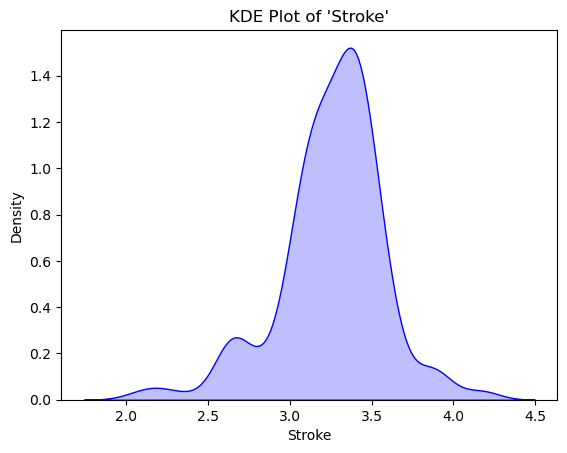

In [45]:
import seaborn as sns

sns.kdeplot(df['stroke'].dropna(), shade=True, color="blue")
plt.title("KDE Plot of 'Stroke'")
plt.xlabel("Stroke")
plt.show()

In [46]:
# Replacing missing values for Bore
values_in_range9 = df.iloc[50:68,18]
mean_value9 = values_in_range9.mean()
print(f"Mean of the values in the range9 df.iloc[50:68,18]: {mean_value9}")

Mean of the values in the range9 df.iloc[50:68,18]: 3.3078571428571424


In [47]:
df.iloc[50:68,18] = df.iloc[50:68,18].fillna(mean_value9)
df.iloc[50:68,18]

50    3.030000
51    3.030000
52    3.030000
53    3.030000
54    3.080000
55    3.307857
56    3.307857
57    3.307857
58    3.307857
59    3.390000
60    3.390000
61    3.390000
62    3.390000
63    3.390000
64    3.390000
65    3.760000
66    3.430000
67    3.580000
Name: bore, dtype: float64

In [48]:
# Replacing missing values for Stroke
values_in_range10 = df.iloc[50:68,19]
median_value10 = values_in_range10.median()
print(f"Median of the values in the range10 df.iloc[50:68,19]: {median_value10}")

Median of the values in the range10 df.iloc[50:68,19]: 3.39


In [49]:
df.iloc[50:68,19] = df.iloc[50:68,19].fillna(median_value10)
df.iloc[50:68,19]

50    3.15
51    3.15
52    3.15
53    3.15
54    3.15
55    3.39
56    3.39
57    3.39
58    3.39
59    3.39
60    3.39
61    3.39
62    3.39
63    3.39
64    3.39
65    3.16
66    3.64
67    3.64
Name: stroke, dtype: float64

#### horsepower seems to be Right/Positively skewed, the missing values are replaced by "Median", for peak-rpm it seems to be not much skewed & closer to symmetry so can be replaced by mean. Both missing values are only for renault

In [50]:
df['horsepower'].skew()

1.3910294937929355

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\3782837310.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['horsepower'].dropna(), shade=True, color="blue")
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


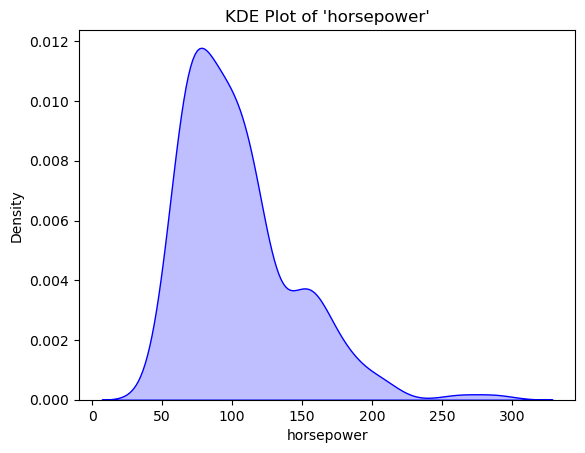

In [51]:
import seaborn as sns

sns.kdeplot(df['horsepower'].dropna(), shade=True, color="blue")
plt.title("KDE Plot of 'horsepower'")
plt.xlabel("horsepower")
plt.show()

In [52]:
df['peak-rpm'].skew()

0.07323669149378209

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\2217448739.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['peak-rpm'].dropna(), shade=True, color="blue")
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


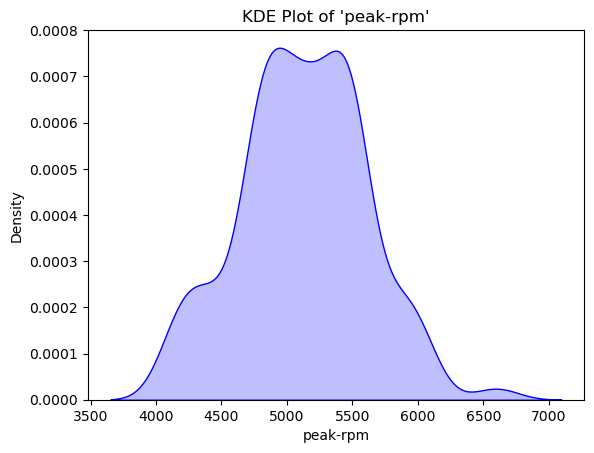

In [53]:
import seaborn as sns

sns.kdeplot(df['peak-rpm'].dropna(), shade=True, color="blue")
plt.title("KDE Plot of 'peak-rpm'")
plt.xlabel("peak-rpm")
plt.show()

In [54]:
# Replacing missing values for horsepower
values_in_range11 = df.iloc[130:133,21]
median_value11 = values_in_range11.median()
print(f"Median of the values in the range11 df.iloc[130:133,21]: {median_value11}")

Median of the values in the range11 df.iloc[130:133,21]: 110.0


In [55]:
df.iloc[130:133,21] = df.iloc[130:133,21].fillna(median_value11)
df.iloc[130:133,21]

130    110.0
131    110.0
132    110.0
Name: horsepower, dtype: float64

In [56]:
# Replacing missing values for peak-rpm
values_in_range12 = df.iloc[130:133,22]
mean_value12 = values_in_range12.mean()
print(f"Mean of the values in the range12 df.iloc[130:133,22]: {mean_value12}")

Mean of the values in the range12 df.iloc[130:133,22]: 5250.0


In [57]:
df.iloc[130:133,22] = df.iloc[130:133,22].fillna(mean_value12)
df.iloc[130:133,22]

130    5250.0
131    5250.0
132    5250.0
Name: peak-rpm, dtype: float64

#### Price seems to be Right/Positively skewed, the missing values are replaced by "Median"

In [58]:
df['price'].skew()

1.8096753390980749

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\2233479961.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'].dropna(), shade=True, color="blue")
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


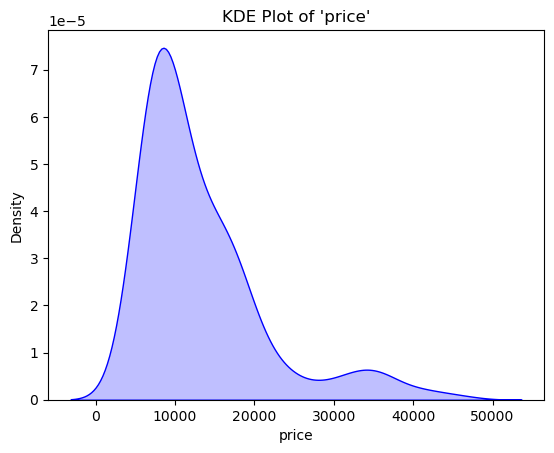

In [59]:
import seaborn as sns

sns.kdeplot(df['price'].dropna(), shade=True, color="blue")
plt.title("KDE Plot of 'price'")
plt.xlabel("price")
plt.show()

In [60]:
# Price value replaced for Audi
P1 = df.iloc[3:10,25]
median_P1 = P1.median()
print(f"Median of the values in the range df.iloc[3:10,25]: {median_P1}")

Median of the values in the range df.iloc[3:10,25]: 17580.0


In [61]:
df.iloc[3:10,25] = df.iloc[3:10,25].fillna(median_P1)
df.iloc[3:10,25]

3    13950.0
4    17450.0
5    15250.0
6    17710.0
7    18920.0
8    23875.0
9    17580.0
Name: price, dtype: float64

In [62]:
# Price value replaced for isuzu
P2 = df.iloc[43:48,25]
median_P2 = P2.median()
print(f"Median of the values in the range df.iloc[43:48,25]: {median_P2}")

Median of the values in the range df.iloc[43:48,25]: 11048.0


In [63]:
df.iloc[43:48,25] = df.iloc[43:48,25].fillna(median_P2)
df.iloc[43:48,25]

43     6785.0
44    11048.0
45    11048.0
46    11048.0
47    32250.0
Name: price, dtype: float64

In [64]:
# Price value replaced for Porsche
P3 = df.iloc[125:131,25]
median_P3 = P3.median()
print(f"Median of the values in the range df.iloc[125:131,25]]: {median_P3}")

Median of the values in the range df.iloc[125:131,25]]: 32528.0


In [65]:
df.iloc[125:131,25] = df.iloc[125:131,25].fillna(median_P3)
df.iloc[125:131,25]

125    22018.0
126    32528.0
127    34028.0
128    37028.0
129    32528.0
130     9295.0
Name: price, dtype: float64

#### Dropping "Num of doors" attribute as it does not contribute much to my analysis

In [66]:
df.drop(['num-of-doors'], axis=1, inplace=True)
df

symboling  normalized-losses         make fuel-type aspiration  \
0            3              154.0  alfa-romero       gas        std   
1            3              154.0  alfa-romero       gas        std   
2            1              154.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front        88.6   168.8  ...   
1    convertible          rwd           front        88.6   168.8  ...   
2      hatchback          rwd           front        94.5   171.2  ...   
3          sedan          fwd           front        99.8   176.6  ...   
4          sedan          4wd           front        99.4   176.6  ...   
..           ...          ...             ...         ...     ...  ...   
200        sedan          rwd           front       109.1   188.8  ...   
201        sedan          rwd           front       109.1   188.8  ...   
202        sedan          rwd           front       109.1   188.8  ...   
203        sedan          rwd           front       109.1   188.8  ...   
204        sedan          rwd           front       109.1   188.8  ...   

     engine-size  fuel-system  bore stroke compression-ratio  horsepower  \
0            130         mpfi  3.47   2.68               9.0       111.0   
1            130         mpfi  3.47   2.68               9.0       111.0   
2            152         mpfi  2.68   3.47               9.0       154.0   
3            109         mpfi  3.19   3.40              10.0       102.0   
4            136         mpfi  3.19   3.40               8.0       115.0   
..           ...          ...   ...    ...               ...         ...   
200          141         mpfi  3.78   3.15               9.5       114.0   
201          141         mpfi  3.78   3.15               8.7       160.0   
202          173         mpfi  3.58   2.87               8.8       134.0   
203          145          idi  3.01   3.40              23.0       106.0   
204          141         mpfi  3.78   3.15               9.5       114.0   

    peak-rpm  city-mpg  highway-mpg    price  
0     5000.0        21           27  13495.0  
1     5000.0        21           27  16500.0  
2     5000.0        19           26  16500.0  
3     5500.0        24           30  13950.0  
4     5500.0        18           22  17450.0  
..       ...       ...          ...      ...  
200   5400.0        23           28  16845.0  
201   5300.0        19           25  19045.0  
202   5500.0        18           23  21485.0  
203   4800.0        26           27  22470.0  
204   5400.0        19           25  22625.0  

[205 rows x 25 columns]

In [67]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Handling Outliers
- Outliers can skew analysis, especially in numerical columns
- We use the Z-score method to detect and remove outliers.
- We use the Interquartile Range (IQR) method to identify and remove outliers in the engine-size column.

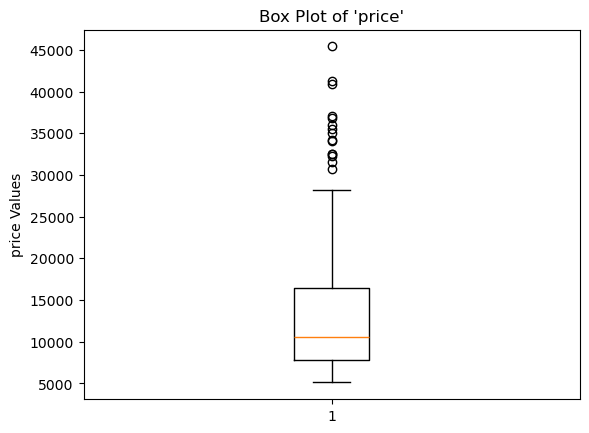

In [68]:
plt.boxplot(df['price'].dropna())
plt.title("Box Plot of 'price'")
plt.ylabel("price Values")
plt.show()

In [69]:
# Function to remove outliers based on Z-scores
def remove_outliers(df, threshold=3):
    """
    Removes outliers based on Z-scores for numeric columns.
    
    Args:
        df (DataFrame): The input dataframe.
        threshold (float): The Z-score threshold to identify outliers.
    
    Returns:
        DataFrame: The cleaned dataframe without outliers.
    """
    # Select only numeric columns except "curb-weight column"
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=["engine-size"])

    # Calculate Z-scores for numeric columns
    z_scores = np.abs(stats.zscore(numeric_cols, nan_policy='omit'))  # Handle NaN values properly
    
    # Check if Z-scores calculation was successful
    print(f"Z-scores calculated for columns: {numeric_cols.columns}")
    
    # Filter the dataset: original DataFrame (df) to include only the rows where all Z-scores are below the threshold.
    cleaned_df = df[(z_scores < threshold).all(axis=1)]
    
    # Print the shape of the dataset before and after outlier removal
    print(f"Dataset shape before removing outliers: {df.shape}")
    print(f"Dataset shape after removing outliers: {cleaned_df.shape}")
    
    return cleaned_df

# Apply the function to remove outliers
df_cleaned = remove_outliers(df)

df_cleaned

Z-scores calculated for columns: Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
Dataset shape before removing outliers: (205, 25)
Dataset shape after removing outliers: (182, 25)


symboling  normalized-losses         make fuel-type aspiration  \
0            3              154.0  alfa-romero       gas        std   
1            3              154.0  alfa-romero       gas        std   
2            1              154.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
199         -1               74.0        volvo       gas      turbo   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
204         -1               95.0        volvo       gas      turbo   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front        88.6   168.8  ...   
1    convertible          rwd           front        88.6   168.8  ...   
2      hatchback          rwd           front        94.5   171.2  ...   
3          sedan          fwd           front        99.8   176.6  ...   
4          sedan          4wd           front        99.4   176.6  ...   
..           ...          ...             ...         ...     ...  ...   
199        wagon          rwd           front       104.3   188.8  ...   
200        sedan          rwd           front       109.1   188.8  ...   
201        sedan          rwd           front       109.1   188.8  ...   
202        sedan          rwd           front       109.1   188.8  ...   
204        sedan          rwd           front       109.1   188.8  ...   

     engine-size  fuel-system  bore stroke compression-ratio  horsepower  \
0            130         mpfi  3.47   2.68               9.0       111.0   
1            130         mpfi  3.47   2.68               9.0       111.0   
2            152         mpfi  2.68   3.47               9.0       154.0   
3            109         mpfi  3.19   3.40              10.0       102.0   
4            136         mpfi  3.19   3.40               8.0       115.0   
..           ...          ...   ...    ...               ...         ...   
199          130         mpfi  3.62   3.15               7.5       162.0   
200          141         mpfi  3.78   3.15               9.5       114.0   
201          141         mpfi  3.78   3.15               8.7       160.0   
202          173         mpfi  3.58   2.87               8.8       134.0   
204          141         mpfi  3.78   3.15               9.5       114.0   

    peak-rpm  city-mpg  highway-mpg    price  
0     5000.0        21           27  13495.0  
1     5000.0        21           27  16500.0  
2     5000.0        19           26  16500.0  
3     5500.0        24           30  13950.0  
4     5500.0        18           22  17450.0  
..       ...       ...          ...      ...  
199   5100.0        17           22  18950.0  
200   5400.0        23           28  16845.0  
201   5300.0        19           25  19045.0  
202   5500.0        18           23  21485.0  
204   5400.0        19           25  22625.0  

[182 rows x 25 columns]

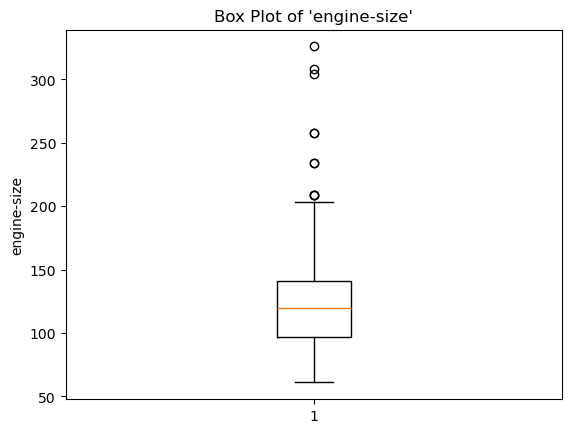

In [142]:
plt.boxplot(df['engine-size'].dropna())
plt.title("Box Plot of 'engine-size'")
plt.ylabel("engine-size")
plt.show()

In [70]:
# Function to remove outliers based on Interquartile Range (IQR) method 
# Using IQR method to detect and remove outliers in 'engine-size'
Q1 = df['engine-size'].quantile(0.25)
Q3 = df['engine-size'].quantile(0.75)
IQR = Q3 - Q1

# Print IQR values for debugging
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

outliers = (df['engine-size'] < (Q1 - 1.5 * IQR)) | (df['engine-size'] > (Q3 + 1.5 * IQR))
print(f"Outliers detected: {outliers.sum()}")

# Check the number of rows before and after removing outliers
print(f"Shape before removing outliers: {df.shape}")
df = df[~outliers]  # Removing rows with outliers
print(f"Shape after removing outliers: {df.shape}")


Q1: 97.0, Q3: 141.0, IQR: 44.0
Outliers detected: 10
Shape before removing outliers: (205, 25)
Shape after removing outliers: (195, 25)


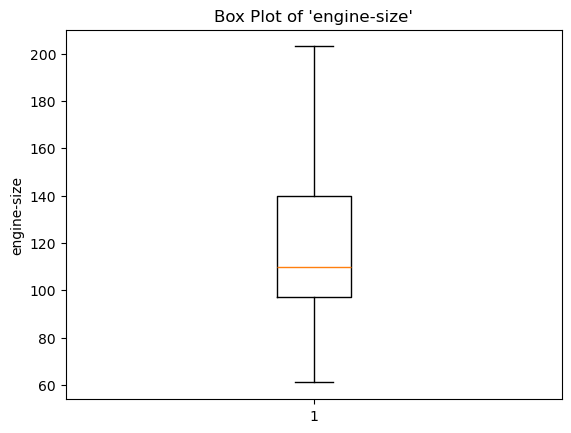

In [144]:
plt.boxplot(df['engine-size'].dropna())
plt.title("Box Plot of 'engine-size'")
plt.ylabel("engine-size")
plt.show()

### Derived Metrics

We create a new column `power_to_weight` which represents the power-to-weight ratio of each car.

In [71]:
# First, check the column names to ensure the required columns exist in your dataset
print("Columns in the dataset:", df.columns)

# Check if the necessary columns exist before calculating derived metrics
if 'horsepower' in df.columns and 'curb-weight' in df.columns:
    # Derived Metric: Power-to-Weight Ratio
    df['power_to_weight'] = df['horsepower'] / df['curb-weight']
else:
    print("Columns 'horsepower' or 'curb-weight' are missing.")

if 'city-mpg' in df.columns and 'highway-mpg' in df.columns:
    # Derived Metric: Fuel Efficiency Ratio
    df['fuel_efficiency_ratio'] = df['city-mpg'] / df['highway-mpg']
else:
    print("Columns 'city-mpg' or 'highway-mpg' are missing.")

if 'price' in df.columns and 'horsepower' in df.columns:
    # Derived Metric: Price per Horsepower
    df['price_per_horsepower'] = df['price'] / df['horsepower']
else:
    print("Columns 'price' or 'horsepower' are missing.")

if 'curb-weight' in df.columns and 'engine-size' in df.columns:
    # Derived Metric: Weight-to-Engine Size Ratio
    df['weight_to_engine_size'] = df['curb-weight'] / df['engine-size']
else:
    print("Columns 'curb-weight' or 'engine-size' are missing.")

# Display the updated DataFrame to check if new columns are added
print(df[['horsepower', 'curb-weight', 'power_to_weight', 'city-mpg', 'highway-mpg', 'fuel_efficiency_ratio', 'price', 'horsepower', 'price_per_horsepower', 'engine-size', 'curb-weight', 'weight_to_engine_size']].head())


Columns in the dataset: Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
   horsepower  curb-weight  power_to_weight  city-mpg  highway-mpg  \
0       111.0         2548         0.043564        21           27   
1       111.0         2548         0.043564        21           27   
2       154.0         2823         0.054552        19           26   
3       102.0         2337         0.043646        24           30   
4       115.0         2824         0.040722        18           22   

   fuel_efficiency_ratio    price  horsepower  price_per_horsepower  \
0               0.777778  13495.0       111.0            121.576577   
1            

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\3045494589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power_to_weight'] = df['horsepower'] / df['curb-weight']
C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\3045494589.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_efficiency_ratio'] = df['city-mpg'] / df['highway-mpg']
C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\3045494589.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

## Data Visualization
### Univariate Analysis
- Visualize the distribution of `price`.
- Analyze the count of `fuel-type`.
- Make: Distribution of car `makes`

C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


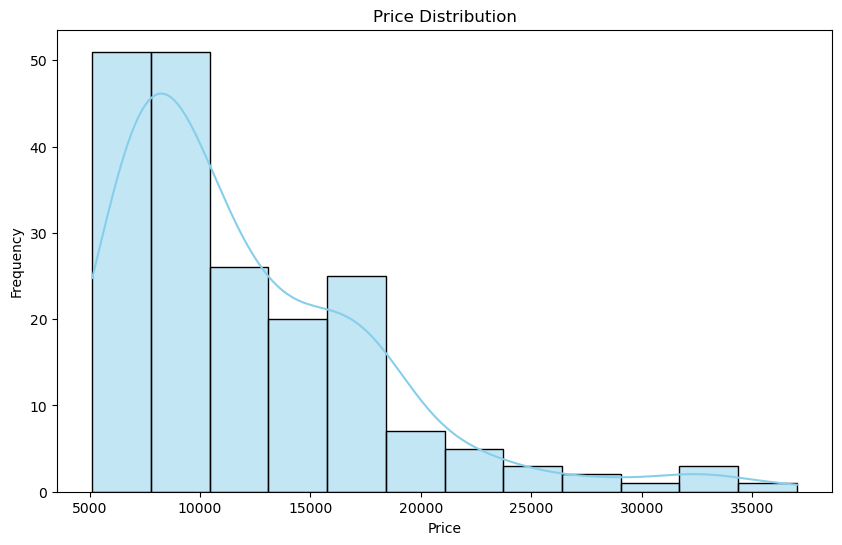

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



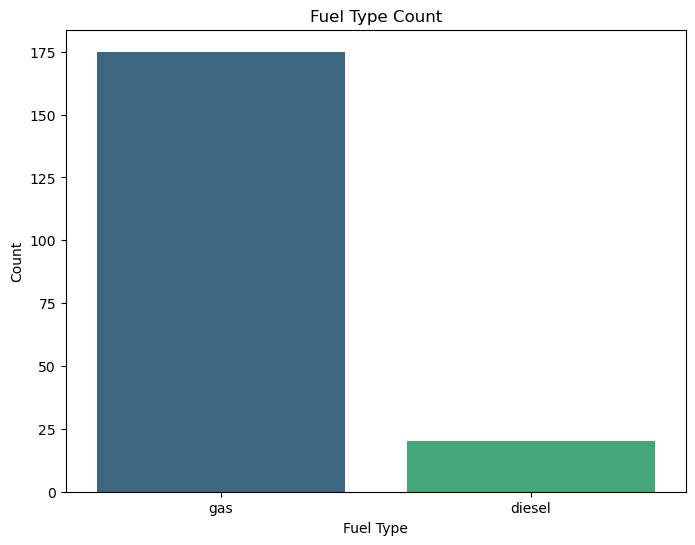

In [73]:
# Univariate Analysis: Count of Fuel Types
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel-type', data=df, palette='viridis')
plt.title('Fuel Type Count')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

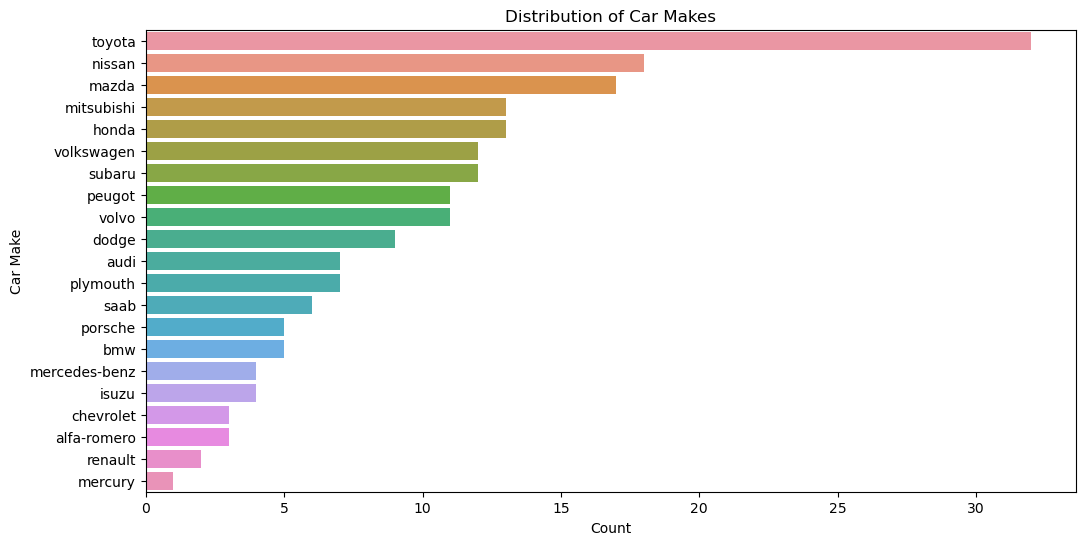

In [74]:
# Make: Distribution of car makes
# Studying the distribution of car makes
plt.figure(figsize=(12, 6))
sns.countplot(y='make', data=df, order=df['make'].value_counts().index)
plt.title('Distribution of Car Makes')
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.show()

### Bivariate Analysis
- Explore relationships between `price` and `engine size`.
- Explore relationships between `Average Price` vs `Car make`
- Explore relationships between `symboling` vs `risk`.
- Explore relationships between `Drive-wheels` vs `Fuel Efficiency ratio` 
- Explore relationships between `Peak-rpm` vs `Horsepower`
- Explore relationships between `fuel-system` vs `body-style`
- Explore relationships between `fuel-system` vs `Car Make`

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\1095569741.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='engine-size', y='price', data=df, palette='coolwarm')


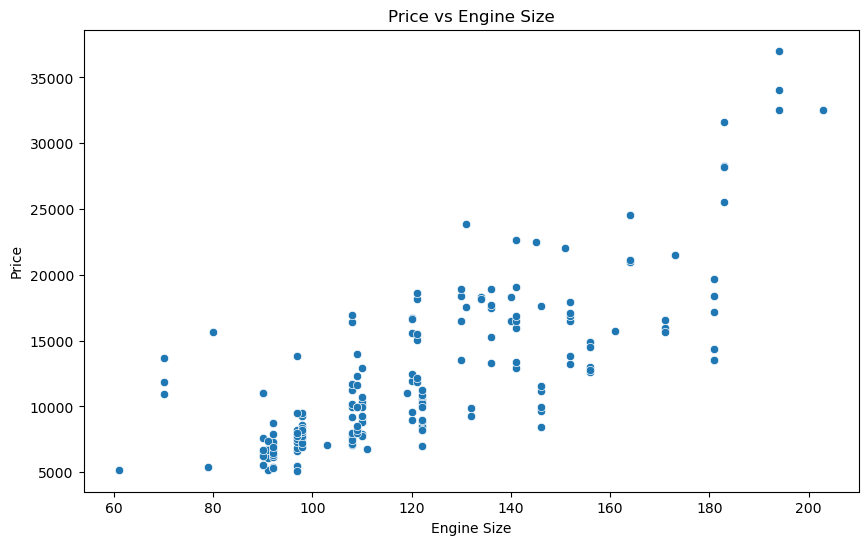

In [75]:
# Bivariate Analysis: Price vs Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine-size', y='price', data=df, palette='coolwarm')
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show() 

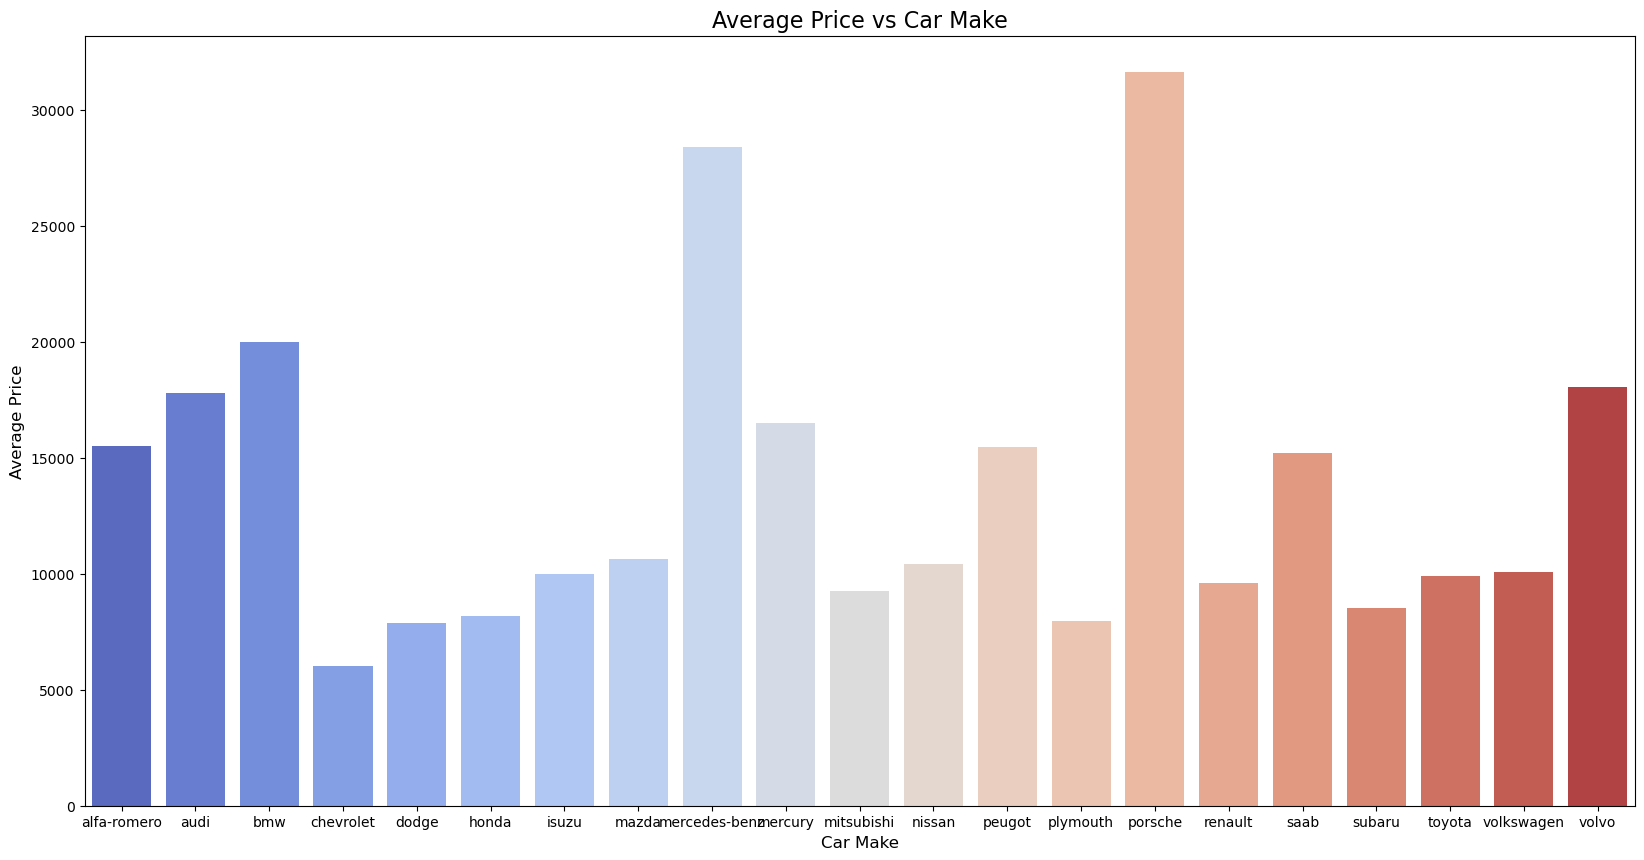

In [76]:
# Bivariate Analysis: Average Price vs Car make
bar_data1 = df.groupby('make', as_index=False)['price'].mean()

# Plot the Bar Graph
plt.figure(figsize=(20,10))
sns.barplot(x='make', y='price', data=bar_data1, palette='coolwarm')

# Add Titles and Labels
plt.title('Average Price vs Car Make', fontsize=16)
plt.xlabel('Car Make', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Display the Plot
plt.show()

C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_18580\2420283565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk'] = df['symboling'].apply(lambda x: 'High Risk' if x > 0 else 'Low Risk')


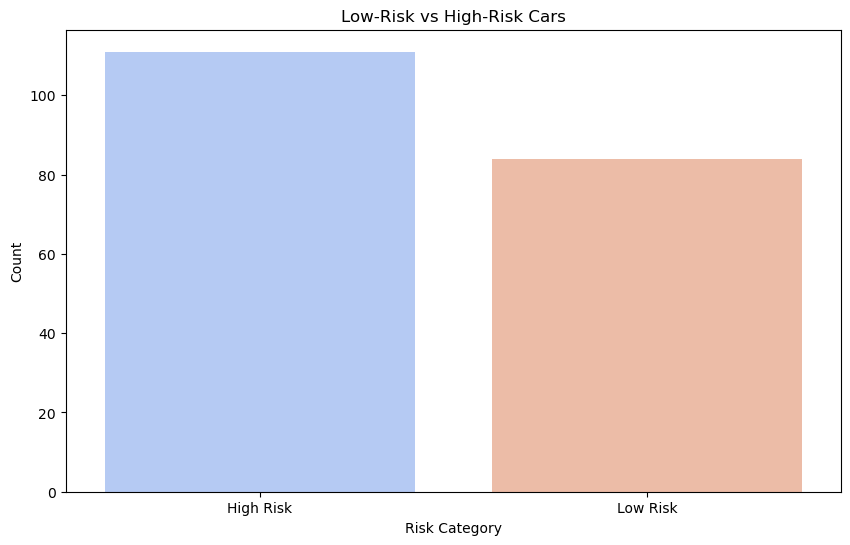

In [77]:
# Symboling vs Risk Factor
# Grouping low-risk and high-risk cars based on 'symboling'
df['risk'] = df['symboling'].apply(lambda x: 'High Risk' if x > 0 else 'Low Risk')

# Plotting Symboling vs Risk Factor
plt.figure(figsize=(10, 6))
sns.countplot(x='risk', data=df, palette='coolwarm')
plt.title('Low-Risk vs High-Risk Cars')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()


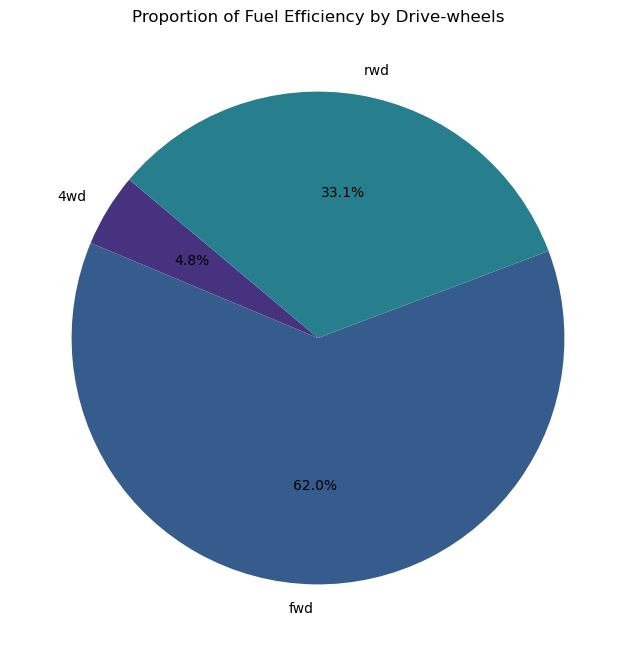

In [78]:
# Drive-wheels vs Fuel Efficiency ratio 
# Aggregate the total fuel efficiency by drive-wheel category
fuel_efficiency_sum = df.groupby('drive-wheels')['fuel_efficiency_ratio'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
fuel_efficiency_sum.plot.pie(autopct='%1.1f%%', labels=fuel_efficiency_sum.index, colors=sns.color_palette('viridis'), startangle=140)
plt.title('Proportion of Fuel Efficiency by Drive-wheels')
plt.ylabel('')  # Remove y-label for better appearance
plt.show()


C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


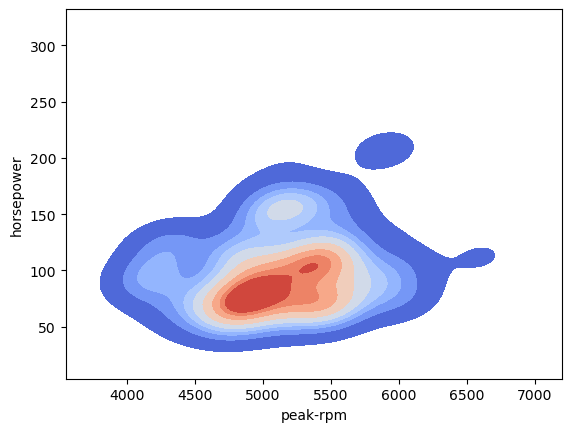

In [161]:
# Peak-rpm vs Horsepower

sns.kdeplot(x='peak-rpm', y='horsepower', data=df, cmap='coolwarm', fill=True)
plt.show()

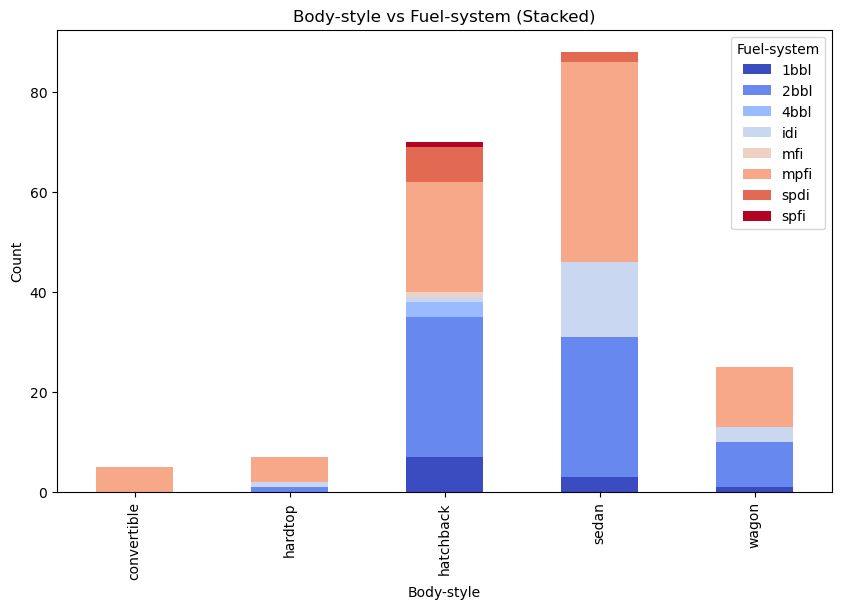

In [162]:
# fuel-system vs body-style 
# Prepare data for stacked bar plot
stacked_data = df.groupby(['body-style', 'fuel-system']).size().unstack()

# Stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Body-style vs Fuel-system (Stacked)')
plt.xlabel('Body-style')
plt.ylabel('Count')
plt.legend(title='Fuel-system')
plt.show()

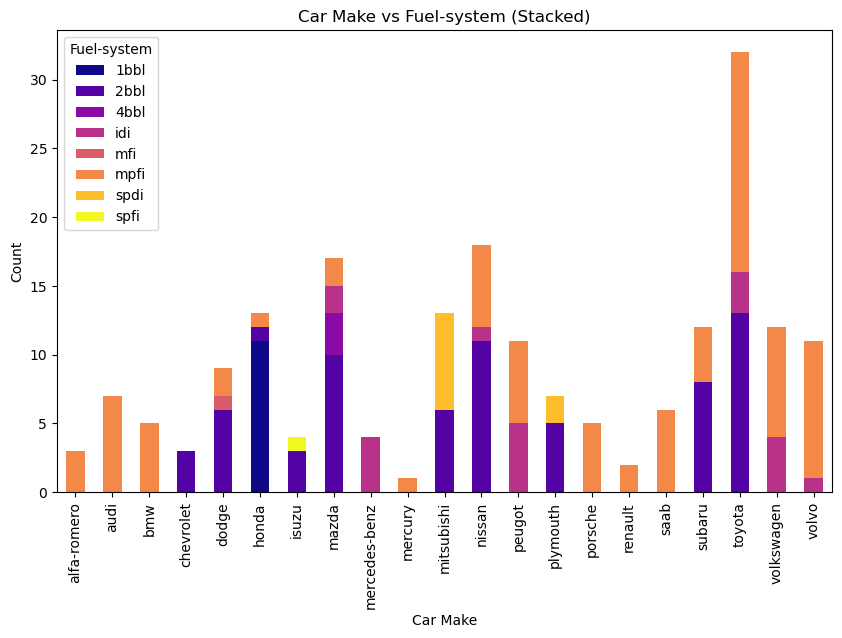

In [163]:
# fuel-system vs Car Make 
# Prepare data for stacked bar plot
stacked_data1 = df.groupby(['make', 'fuel-system']).size().unstack()

# Stacked bar plot
stacked_data1.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Car Make vs Fuel-system (Stacked)')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.legend(title='Fuel-system')
plt.show()

### Multivariate Analysis
- Explore relationships between `price`, `engine size`, `horsepower`, and `fuel type` using pair plots.
- How `City-mpg` vs `Highway-mpg` vary based on the `fuel-system`?
- Distribution of `city-mpg` and `curb-weight` for each `body-style`
- Comparing `horsepower`, `weight`, `engine size` across price segments

C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANUSREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


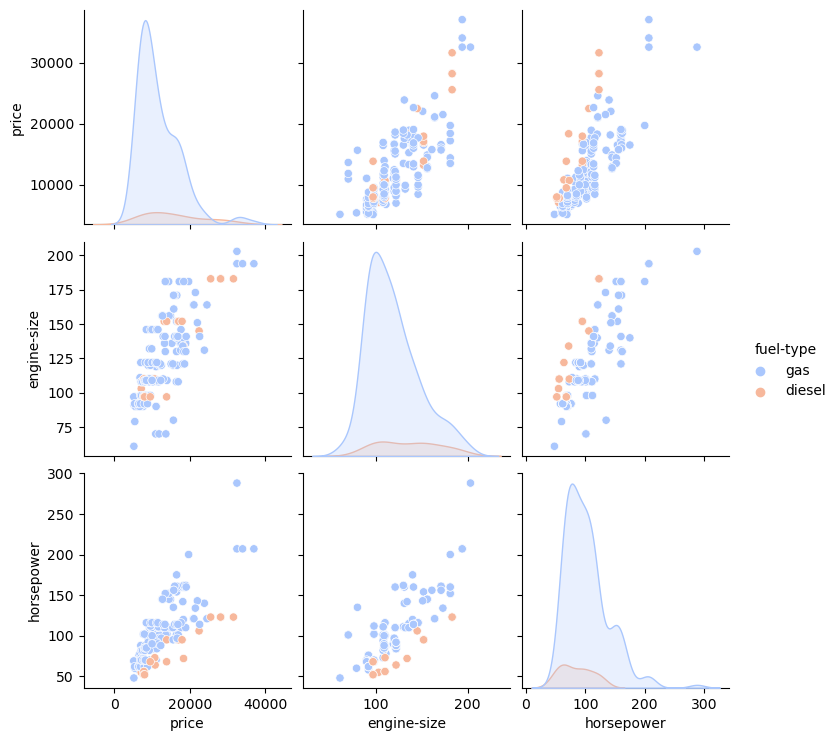

In [164]:
# Multivariate Analysis: Pair Plot
sns.pairplot(df[['price', 'engine-size', 'horsepower', 'fuel-type']], hue='fuel-type', palette='coolwarm')
plt.show()


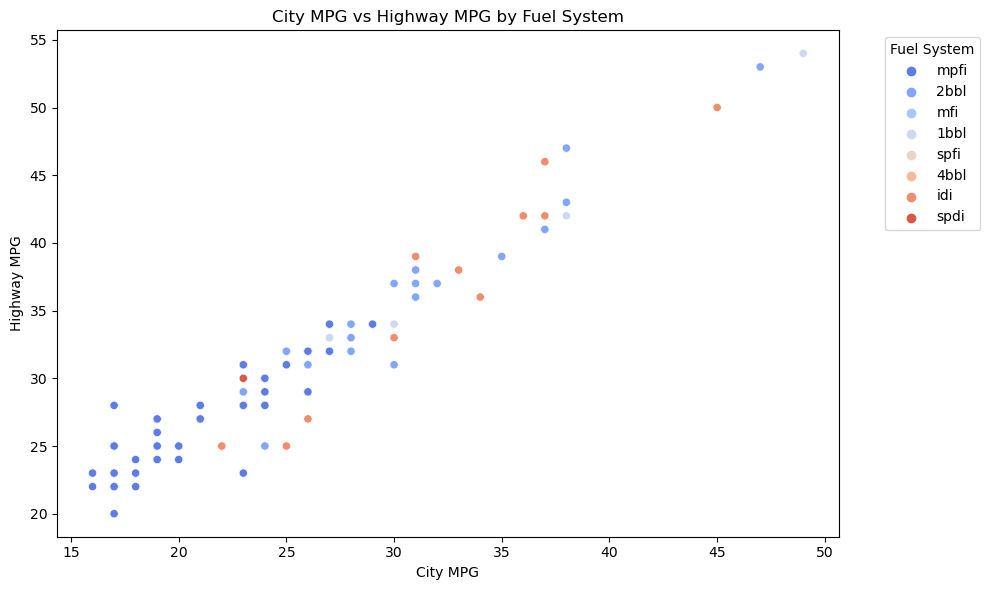

In [165]:
#City-mpg vs Highway-mpg" vary based on the fuel-system
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city-mpg', y='highway-mpg', hue='fuel-system', data=df, palette='coolwarm')
plt.title('City MPG vs Highway MPG by Fuel System')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.legend(title='Fuel System', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

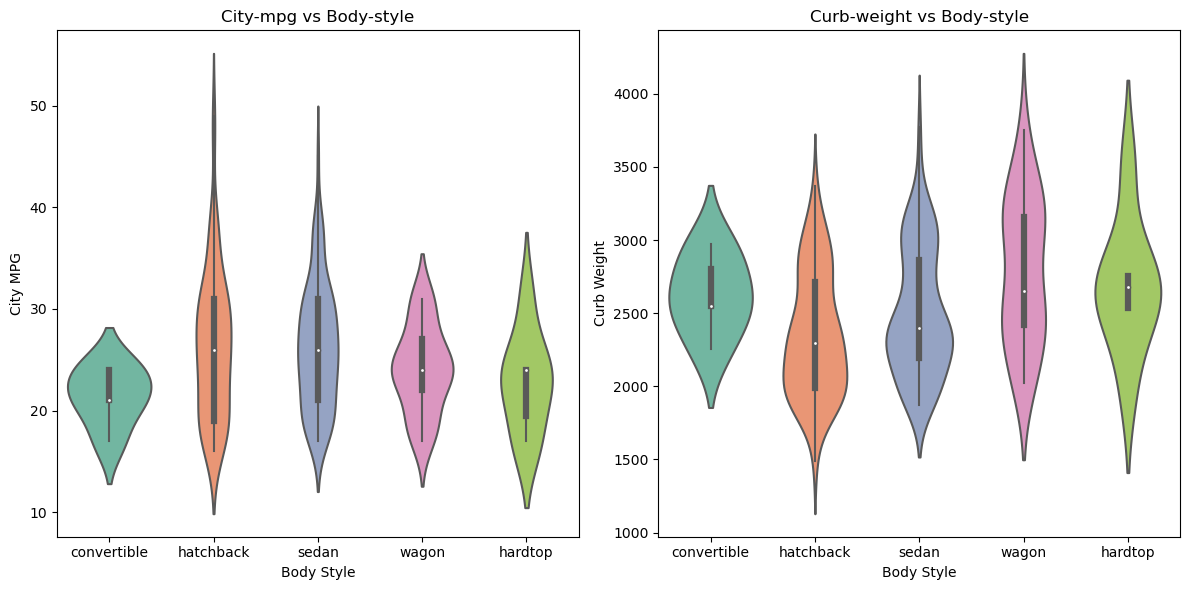

In [166]:
#distribution of city-mpg and curb-weight for each body-style
plt.figure(figsize=(12, 6))

# City-mpg vs Body-style
plt.subplot(1, 2, 1)
sns.violinplot(x='body-style', y='city-mpg', data=df, palette='Set2')
plt.title('City-mpg vs Body-style')
plt.xlabel('Body Style')
plt.ylabel('City MPG')

# Curb-weight vs Body-style
plt.subplot(1, 2, 2)
sns.violinplot(x='body-style', y='curb-weight', data=df, palette='Set2')
plt.title('Curb-weight vs Body-style')
plt.xlabel('Body Style')
plt.ylabel('Curb Weight')

plt.tight_layout()
plt.show()


C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_3104\3498815003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_segment'] = pd.cut(df['price'], bins=bins, labels=labels)
C:\Users\ANUSREE\AppData\Local\Temp\ipykernel_3104\3498815003.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('price_segment')[['horsepower', 'curb-weight','engine-size']].mean().reset_index()


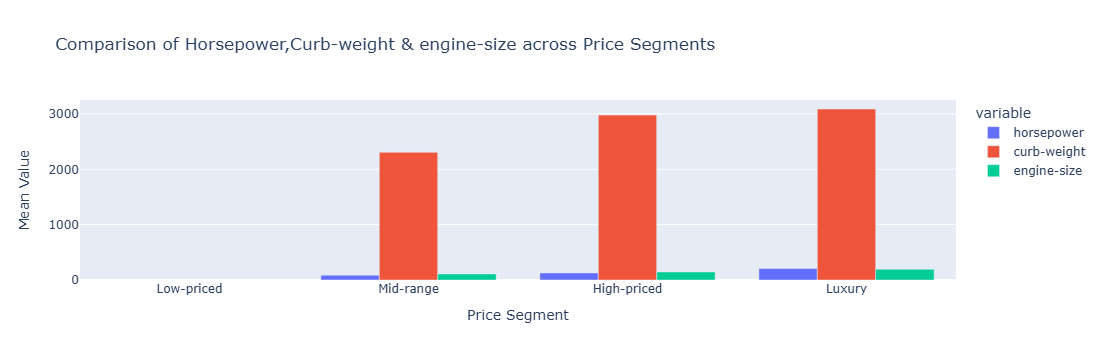

In [167]:
# Comparing horsepower, weight, engine size across price segments
import plotly.express as px
# Creating price segments (bins)
bins = [0, 5000, 15000, 30000, 100000]
labels = ['Low-priced', 'Mid-range', 'High-priced', 'Luxury']
df['price_segment'] = pd.cut(df['price'], bins=bins, labels=labels)

# Grouping data by price segment and calculating the mean for horsepower, curb-weight & engine-size
grouped_df = df.groupby('price_segment')[['horsepower', 'curb-weight','engine-size']].mean().reset_index()

# Creating an interactive grouped bar plot
fig = px.bar(grouped_df, 
             x='price_segment', 
             y=['horsepower', 'curb-weight','engine-size'], 
             barmode='group',
             labels={'price_segment': 'Price Segment', 'value': 'Mean Value'},
             title='Comparison of Horsepower,Curb-weight & engine-size across Price Segments')

# Show the plot
fig.show()


### Correlation Matrix
- Analyze correlations between numeric features using a heatmap.


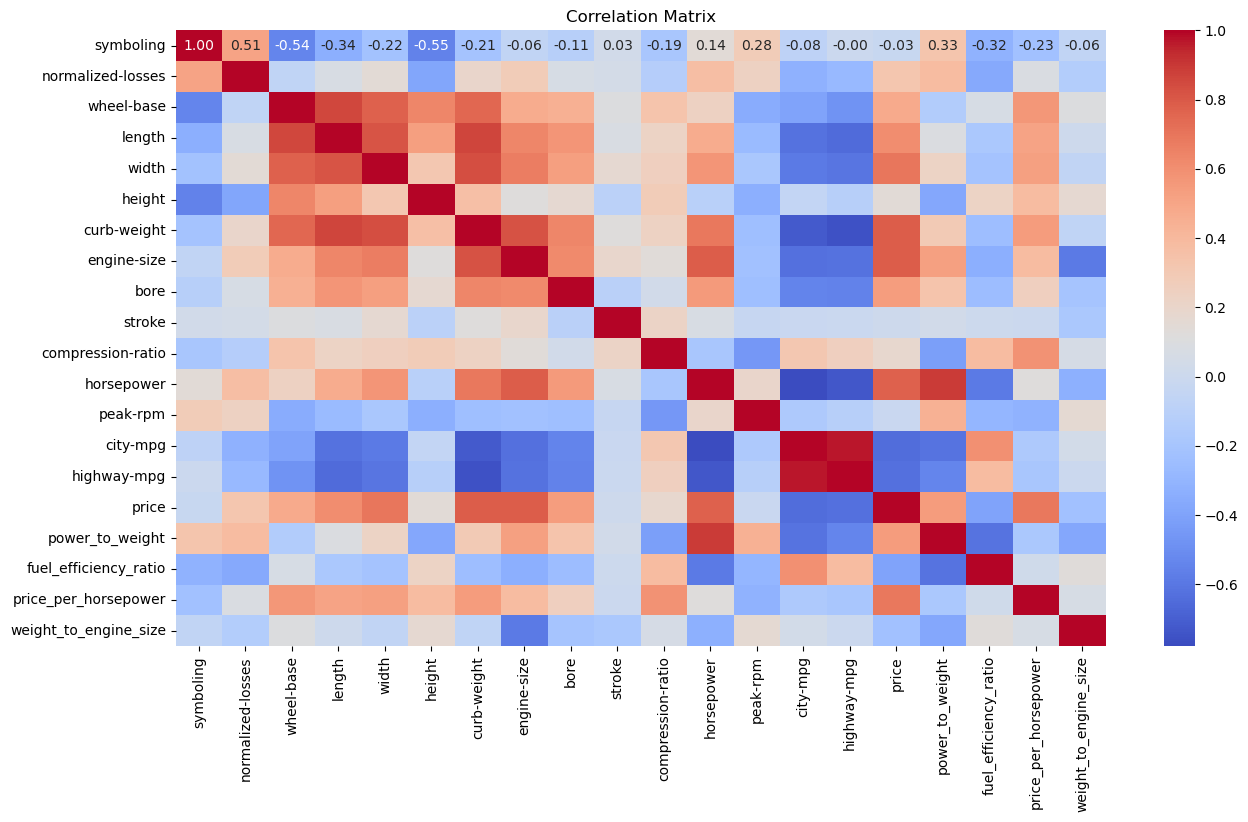

In [168]:
# Correlation Matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Hypothesis Testing

We perform a T-test to check if there is a significant difference in horsepower between high-risk and low-risk cars.

In [169]:
if 'symboling' in df.columns:

    # T-Test: Checking if the mean horsepower differs between high-risk and low-risk cars
    high_risk_horsepower = df[df['risk'] == 'High Risk']['horsepower']
    low_risk_horsepower = df[df['risk'] == 'Low Risk']['horsepower']

    # Perform T-test
    from scipy import stats
    t_stat, p_value = stats.ttest_ind(high_risk_horsepower, low_risk_horsepower)

    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Interpretation of the result
    if p_value < 0.05:
        print("We reject the null hypothesis. There is a significant difference in horsepower between high-risk and low-risk cars.")
    else:
        print("We fail to reject the null hypothesis. There is no significant difference in horsepower between high-risk and low-risk cars.")
else:
    print("symboling' column not found")

T-statistic: 0.2309542897214658, P-value: 0.8175949607952915
We fail to reject the null hypothesis. There is no significant difference in horsepower between high-risk and low-risk cars.
